# Diabetes dataset, into data analysis

In [30]:
%matplotlib inline

In [120]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy import stats
from sklearn import datasets

The dataset can be loaded from sklearn module dataset. Sadly, documentation on this particular dataset is extremely scarce, therefore we need to work on the dataset itself a little.

In [2]:
diabetes = datasets.load_diabetes()

### It is quite convenient to turn the dataset into pandas DataFrame object at the very beginning. 
Since I plan to use seaborn, which is based on matplotlib, this makes any visualisations quite simple. 
The same goes for scipy lib.

It is worth noting that we need to classify the data first. Here are things to observe
1. Dataset is standarized - this makes it quite difficult, or sometimes impossible to reach all important information
2. The dataset is not proberly described

The latter is much more serious issue, since we do not know what the corresponding columns mean - there is also no mention about it in the sklearn documentation. Luckily, after some intensive search, I have managed to find a source 

    http://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.html
    
Under this link you can find details on what the diabetes dataset actually represents.

### Note the following excerpt:
   
    "Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

This helps us to indetify the instances present in the data. Create the index, that will serve as indetifier heading in our DataFrame

In [3]:
index = ["age", "sex", "bmi", "avbp" , "s1", "s2", "s3", "s4", "s5", "s6"]

In [4]:
df = pd.DataFrame(diabetes['data'], columns=index)

In [5]:
df.head()

,age,sex,bmi,avbp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Now we clearly see that DataFrame is properly described

Now it is also the time to add the our target - name it "y" for instance. It will represent the aforementioned : 

    "a quantitative measure of disease progression one year after baseline."
    
Since the data was initially in pseudo-dictionary form, we can add second DataFrame object with just "Y" and the join it with our df, containing the instances and samples.

In [6]:
dfy = pd.DataFrame(diabetes['target'], columns=['Y'])
print (df.shape, dfy.shape)

(442, 10) (442, 1)


Displaying the sizes of DataFrames indicates the way the two object should be merged

In [7]:
df = pd.concat([df, dfy], axis = 1)
df.head()

,age,sex,bmi,avbp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


We confirmed that DataFrame object was correctly merged. 

    Note that displaying the data in that manner is sometimes not enough. Because in this case, data seems unbiased (in sense the dataset was randomly filled in, or the subjects were drawn form normal distribution), we can firlmy state that the order of entries does not matter. However, always try to verify that, because especially in large datasets, taking a chunk of it, e.g. first 10k entries, might influence the further data analysis.

We can now see some basic info about our DataFrame.

In [14]:
df[['age', 'sex', 'bmi', 'avbp']].describe()

,age,sex,bmi,avbp
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01


And about mysterious blood serums

In [15]:
df[['s1', 's2', 's3', 's4', 's5', 's6']].describe()

,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Now let's throw in some visualisation that will help us to see some patterns in data, if there are any to be seen.
We will use seaborn for that
 1. See if the samples follow any distribution, age is the best instance to check that
 2. Perhaps look at how the our "Y", i.e. measure of condition's development, is correlated to age
 3. Maybe subject's sex is somehow connected to the likelihood of developing diabetes?

[<matplotlib.text.Text at 0xc42bd30>, <matplotlib.text.Text at 0xc413710>]

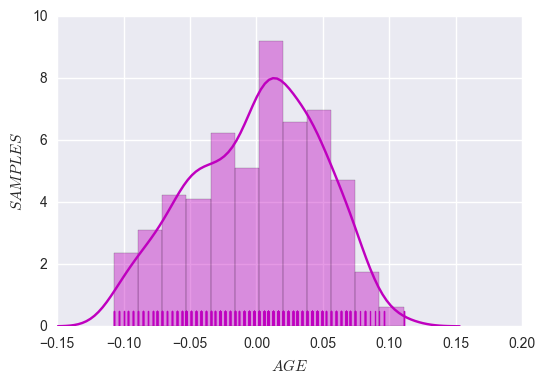

In [38]:
dist = sns.distplot(df['age'], rug=True, color='m')
dist.set(xlabel="$AGE$", ylabel="$SAMPLES$")

It looks fammiliar to skewed normal distribution to me, it is somehow expected. We are happy to see, that the sampling is enough for the distribution to have this bell-shape. (According to CLT, this result is not surprising).

[<matplotlib.text.Text at 0xd7d3cd0>, <matplotlib.text.Text at 0xd58f070>]

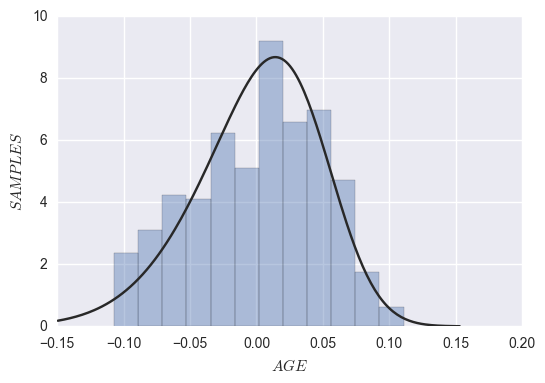

In [32]:
dist = sns.distplot(df['age'], kde=False, fit=stats.skewnorm)
dist.set(xlabel="$AGE$", ylabel="$SAMPLES$")

Now let us see how it is correlated to the "Y" measure

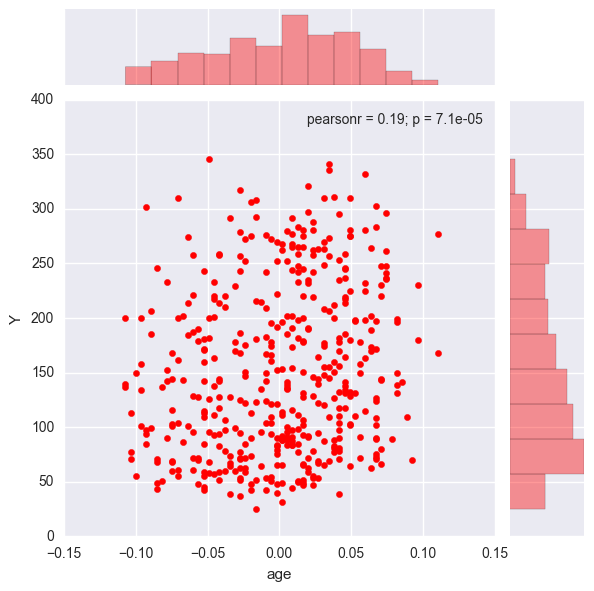

In [42]:
cor = sns.jointplot(x="age", y="Y", data = df, color ='r')

Perhaps turning it into kernel plot would help

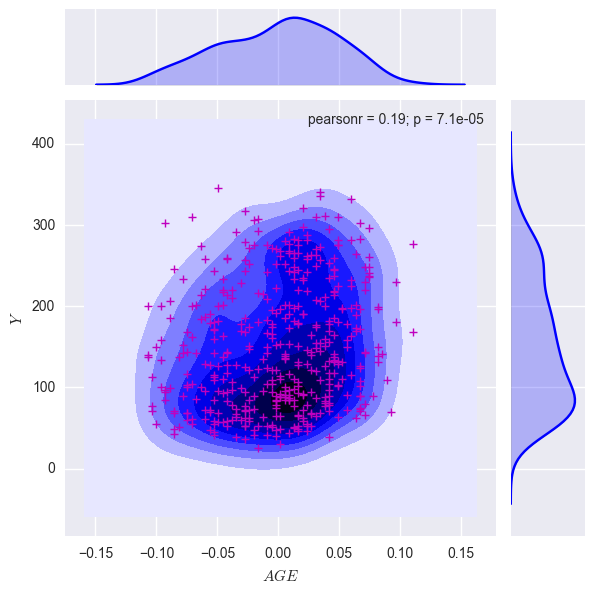

In [48]:
kp = sns.jointplot(x='age', y='Y', data=df, kind='kde', color='b')
kp.plot_joint(plt.scatter, c='m', s=30, linewidth=1, marker="+")
kp.set_axis_labels("$AGE$", "$Y$")

[<matplotlib.text.Text at 0xd7d3150>, <matplotlib.text.Text at 0xd7ad590>]

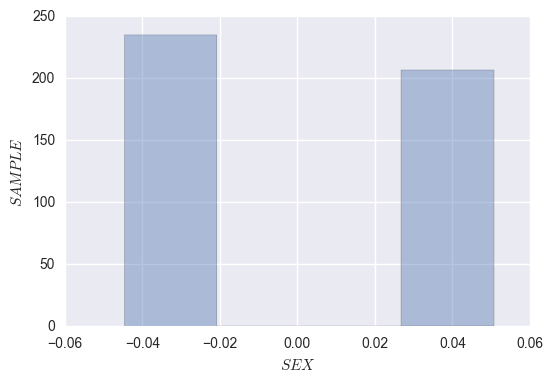

In [51]:
sd = sns.distplot(df['sex'], kde=False)
sd.set(xlabel="$SEX$", ylabel="$SAMPLE$")

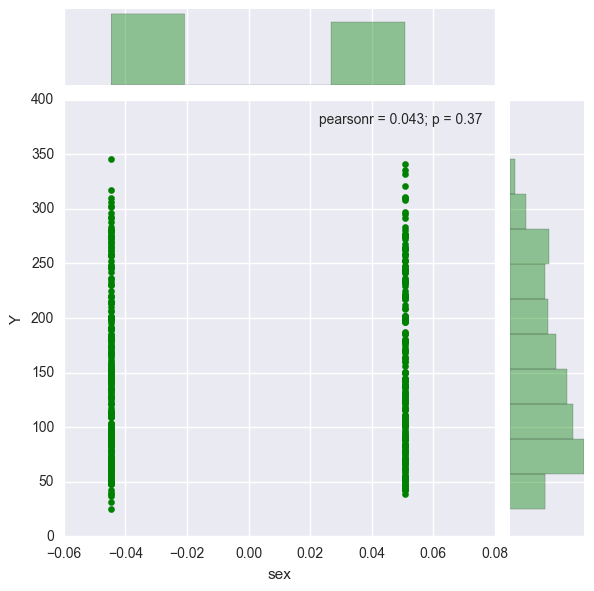

In [52]:
s_y = sns.jointplot(x="sex", y="Y", data = df, color ='g')

Above results yield little information, maybe we should try to find specifics for a particular sex

In [80]:
print(df['age'][df['sex']>0].count())
print(df['age'][df['sex']<0].count())

207
235


In [72]:
sex_A = df[['age', 'bmi' , 'avbp', 'Y']][df['sex']>0]
sex_B = df[['age', 'bmi' , 'avbp', 'Y']][df['sex']<0]

print (sex_A.shape, sex_B.shape)

print ("Below stats for sex_A and sex_B")

(207, 4) (235, 4)
Below stats for sex_A and sex_B


In [78]:
print ("SEX A")
display(sex_A.describe())
print ("SEX B")
display(sex_B.describe())

SEX A


,age,bmi,avbp,Y
count,207.000000,207.000000,207.000000,207.000000
mean,0.008805,0.004468,0.012215,155.666667
std,0.046125,0.045379,0.043427,78.453313
min,-0.103593,-0.090275,-0.084857,39.000000
25%,-0.027310,-0.025607,-0.019442,88.000000
50%,0.016281,-0.005128,0.008101,141.000000
75%,0.041708,0.028284,0.049415,220.500000
max,0.110727,0.170555,0.107944,341.000000


SEX B


,age,bmi,avbp,Y
count,235.000000,235.000000,235.000000,235.000000
mean,-0.007756,-0.003936,-0.010759,149.021277
std,0.047661,0.049269,0.048632,75.905781
min,-0.107226,-0.084886,-0.112400,25.000000
25%,-0.041840,-0.045007,-0.043542,85.500000
50%,-0.001882,-0.009439,-0.022885,140.000000
75%,0.023546,0.034212,0.021872,200.000000
max,0.096197,0.160855,0.132044,346.000000


[<matplotlib.text.Text at 0xe2ecd30>, <matplotlib.text.Text at 0xe2e28d0>]

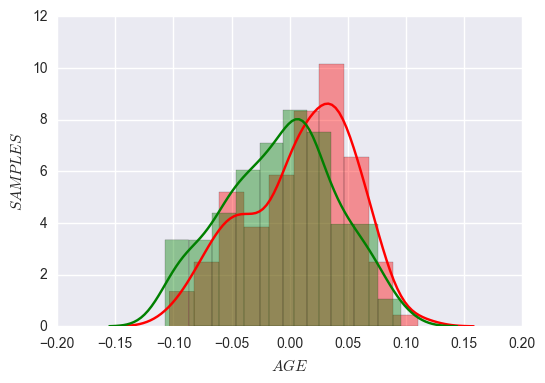

In [86]:
sex_A_age = sns.distplot(sex_A['age'], color ='r')
sex_B_age = sns.distplot(sex_B['age'], color ='g')
sex_A_age.set(xlabel="$AGE$", ylabel="$SAMPLES$")

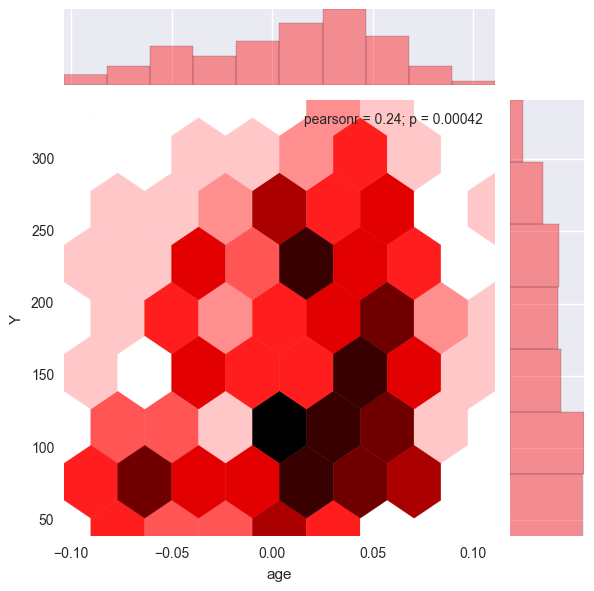

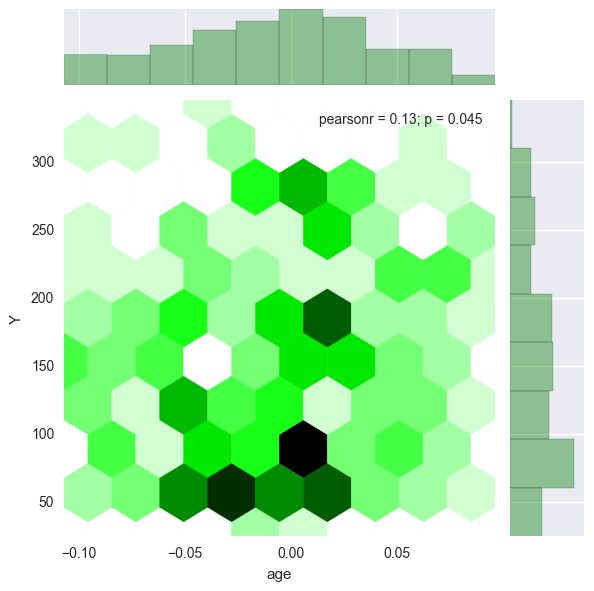

In [87]:
sns.jointplot(x='age', y='Y', kind='hex', color = "r", data = sex_A)
sns.jointplot(x='age', y='Y', kind='hex', color = "g", data = sex_B)

### Some conlusions
We see that the two are significantly different - sex A has an inclination to develop diabetes in elder age, wheres sex B does not develop diabietes to the same extent in the same age intervals. It could be said, that in case of sex B more people are developing diabetes in middle age, but it does not develop further to more advanced stadiums. However, please note that from the distribution of samples, in respect to sex of a subject, we see that two curves are skewed differently, with sex A having a mean shifted towards elder ages than B.

Now let's develop some pairplots - I would like to see how the sets are represented in terms of the following pairs:

1. age - bmi
2. bmi - "Y"
3. average blood pressure - age
4. average blood pressure - bmi

for each sex.

Seaborn's pairplot module provides very comfortable way to do this. In addition we get some extra features

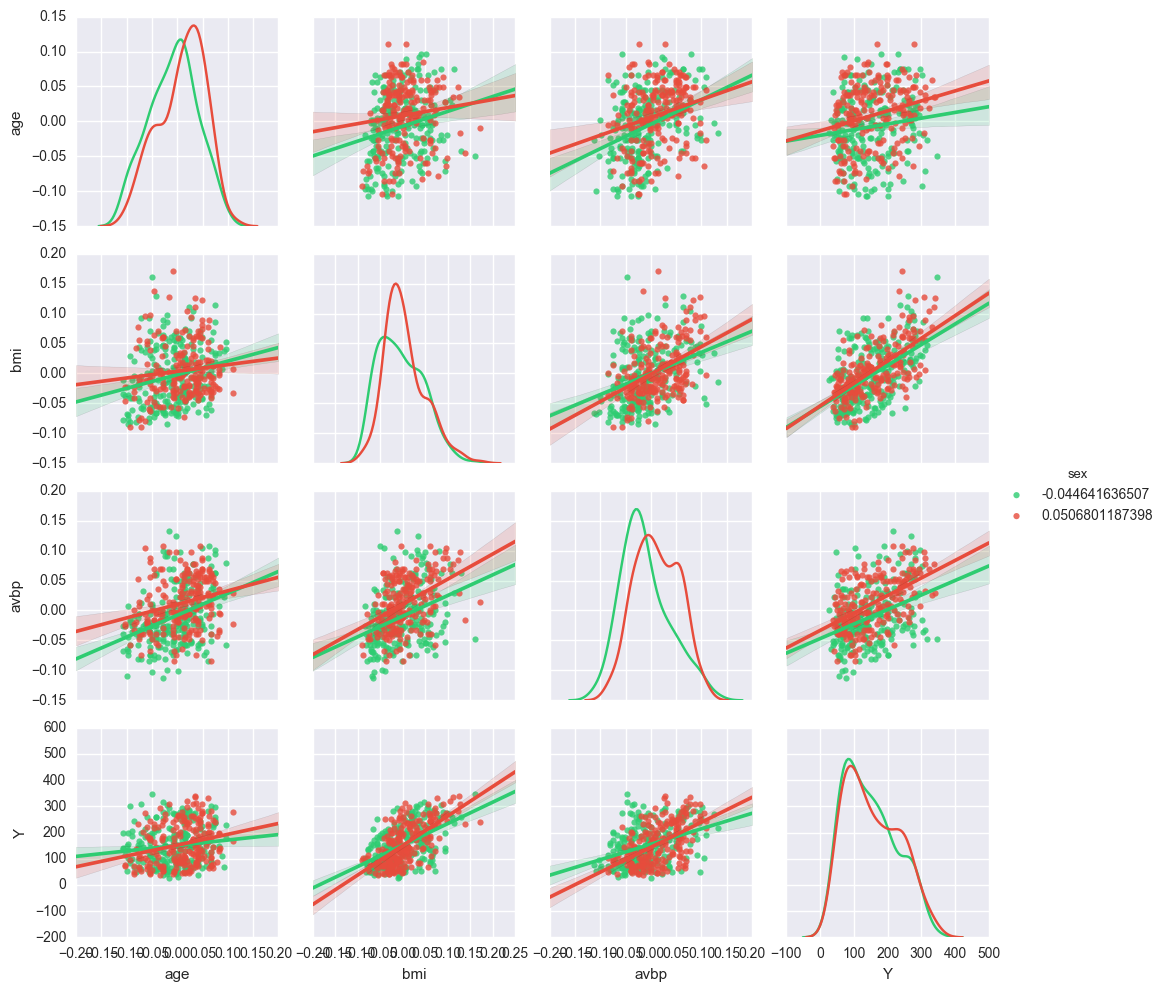

In [105]:
A = sns.pairplot(df, vars = ["age", "bmi", "avbp", "Y"], 
                 hue="sex", palette=["#2ecc71", "#e74c3c"], 
                 kind='reg', diag_kind='kde')

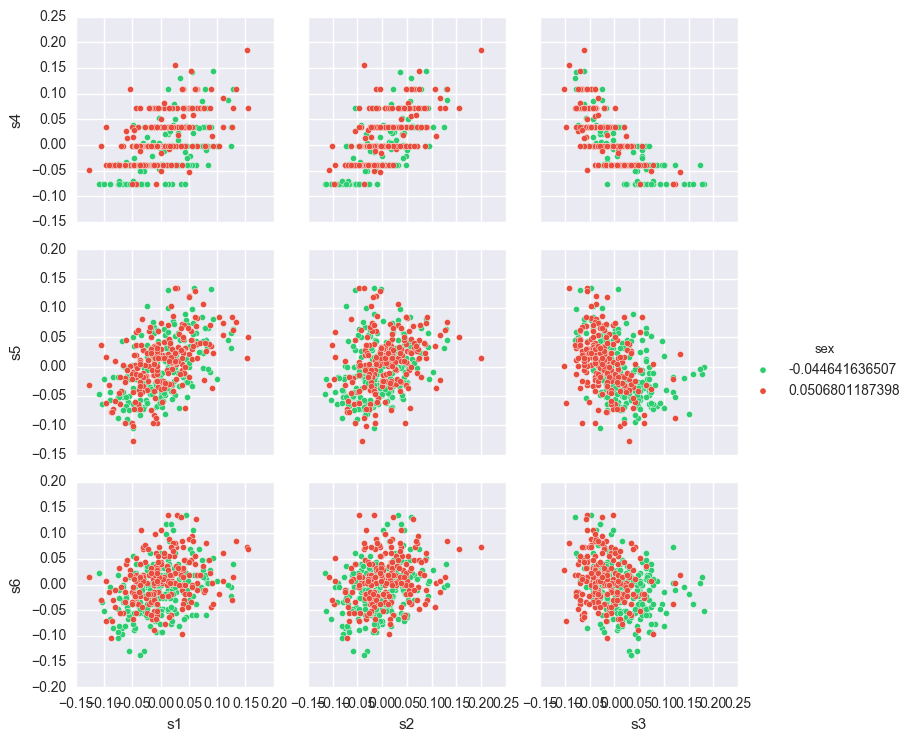

In [109]:
B = sns.pairplot(df, x_vars = ["s1", "s2", "s3"], 
                 y_vars =["s4" ,"s5", "s6"], hue="sex", 
                 palette=["#2ecc71", "#e74c3c"] )

### Now time has come to fit a model.
Obviously the type of data encourages regressive approach.

In [110]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [182]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["age", "sex", "bmi", "avbp" , "s1", "s2", "s3", "s4", "s5", "s6"]], 
    df["Y"], test_size = 0.33, random_state = 1)

In [115]:
print ("Size of a training set :", x_train.shape, y_train.shape)
print ("Size of a test set :", x_test.shape, y_test.shape)

Size of a training set : (296, 10) (296,)
Size of a test set : (146, 10) (146,)


In [116]:
models = {'LinReg' : linear_model.LinearRegression(),
          'Ridge'  : linear_model.Ridge(),
          'RidgeCV': linear_model.RidgeCV(),
          'Lasso'  : linear_model.Lasso(),
          'LassoCV': linear_model.LassoCV(),
          'LassoLarsIC_AIC': linear_model.LassoLarsIC(criterion ='aic'),
          'LassoLarsIC_BIC': linear_model.LassoLarsIC(criterion ='bic'),
          'LassoLars' : linear_model.LassoLars(),
          'ElasticNet' : linear_model.ElasticNet()          
        }

Major parameters for a batch of above models is called alpah

In [118]:
alphas = np.logspace(-10, 0.5, 40)

Below is a quick script to test all models, pick the best alpha for them and assert their training time.

In [121]:
scores = {}
t_check = []
t2 = 0
for name, model in models.items():
    for alpha in alphas:
        model.alpha = alpha
        if 'CV' in name:
            model.cv = 20
        #check time of training
        t1 = time.time()
        model.fit(x_train, y_train)
        t2 = time.time() - t1
        t_check.append((model.score(x_test, y_test), t2))
    scores[name] = (max(t_check))
    t_check = []

c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [181]:
for key in scores:
    print ("%s scored: %f ; training time : %f \n" 
           %(key, scores[key][0], scores[key][1]))

Lasso scored: 0.438485 ; training time : 0.174278 

LassoCV scored: 0.433065 ; training time : 0.316245 

Ridge scored: 0.442545 ; training time : 0.000000 

LinReg scored: 0.438485 ; training time : 0.163180 

LassoLarsIC_BIC scored: 0.419031 ; training time : 0.241853 

LassoLars scored: 0.438485 ; training time : 0.004004 

ElasticNet scored: 0.442549 ; training time : 0.001000 

RidgeCV scored: 0.441746 ; training time : 0.336268 

LassoLarsIC_AIC scored: 0.434202 ; training time : 0.005024 



Results are quite bad, none of the models scored above 50% at its best value of alpha. But note, we have picked all the features. Let's be selective this time and look only for 2. If we come back to out gridplots, we can see that the relation age-bmi is occupied with relatively small dispersion - maybe it will be better tuned instance choice that previously?

In [180]:
x_train, x_test, y_train, y_test = train_test_split(df[["age", "bmi"]],
                                                    df["Y"], test_size=0.3)

In [131]:
print ("Size of a training set :", x_train.shape, y_train.shape)
print ("Size of a test set :", x_test.shape, y_test.shape)

Size of a training set : (309, 2) (309,)
Size of a test set : (133, 2) (133,)


In [134]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
print(linreg.score(x_test, y_test))

0.375431287237


Perhaps some classification target would yield some more promising results. 
The "Y" parameter can be sort of reduced to a set of intervals 
    1. low "Y" indexing
    2. middle "Y" indexing
    3. high "Y" indexing

However, at first  glance it is difficult to determine what intervals to take. Since data is normalized, we can expect that 2. oscillates in the neighbourhood of mean, with 1. and 2. scatttered more to the left and right.

Let's look again at "Y" parameter and see if we can somehow come out with reasonable furhter quantization.

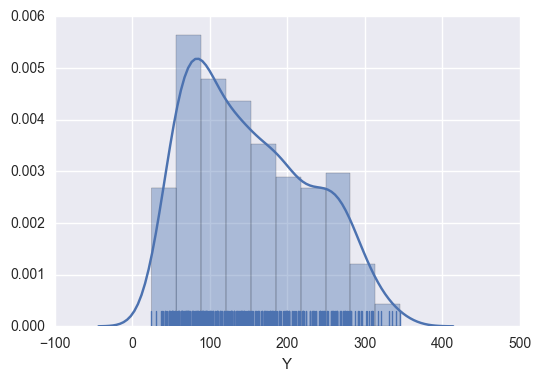

In [178]:
sns.distplot(df["Y"], kde=True, rug=True)

In [179]:
df["Y"].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

##### Obviously we can just take corresponding quartiles:
take 87 for low , 140.5 for middle , and 211 .5 for high

In [225]:
class_df = pd.DataFrame({'class' : pd.Series(np.random.randn(442))})
print(class_df.head())
df2 = df
pd.concat([df2, class_df], axis =1)
print(df2.head())
df2['class'][df['Y'] <87 ] = 0
df2['class'][(df['Y'] >=87) & (df['Y'] <140.5) ] = 1
df2['class'][(df['Y'] >=140.5) & (df['Y'] < 211.5) ] = 2
df2['class'][df['Y'] >=211.5 ] = 3
print(df2.head())


      class
0 -1.690048
1  0.101590
2 -0.952072
3 -0.054108
4 -0.526088
        age       sex       bmi      avbp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6      Y  class  
0 -0.002592  0.019908 -0.017646  151.0      0  
1 -0.039493 -0.068330 -0.092204   75.0      0  
2 -0.002592  0.002864 -0.025930  141.0      0  
3  0.034309  0.022692 -0.009362  206.0      0  
4 -0.002592 -0.031991 -0.046641  135.0      0  


c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


        age       sex       bmi      avbp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6      Y  class  
0 -0.002592  0.019908 -0.017646  151.0      2  
1 -0.039493 -0.068330 -0.092204   75.0      0  
2 -0.002592  0.002864 -0.025930  141.0      2  
3  0.034309  0.022692 -0.009362  206.0      2  
4 -0.002592 -0.031991 -0.046641  135.0      1  


c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [228]:
df2['class'].tail()

437    2
438    1
439    1
440    3
441    0
Name: class, dtype: int64

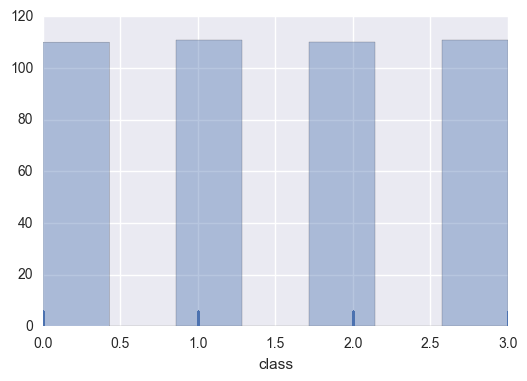

In [230]:
sns.distplot(df2['class'], kde=False, rug=True)

In [231]:
from sklearn.cluster import KMeans

In [232]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-means algorithm for a
 |      single run.
 |  
 |  n_init : int, default: 10
 |      Number of time the k-means algorithm will be run with different
 |      centroid seeds. The final results will be the best output of
 |      n_init consecutive runs in terms of inertia.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up co

-0.0925258118446
[7 7 6 3 4 7 4 5 4 5 4 7 4 0 4 0 3 2 0 5 7 1 4 0 3 7 0 7 7 4 1 5 3 5 3 3 4
 1 5 0 1 0 7 5 6 1 7 3 0 4 2 0 0 2 1 0 0 2 5 2 4 5 0 1 6 2 3 3 3 7 7 3 3 4
 5 2 2 6 0 6 6 5 1 0 4 0 0 5 3 6 1 5 6 5 4 7 7 1 5 3 1 5 4 7 5 3 3 7 4 3 6
 4 0 7 5 1 4 7 2 2 0 7 5 1 4 5 5 1 7 3 1 1 3 3 4 7 1 4 5 5 4 1 5 5 2 5 3 0
 5 5 0 7 1 7 4 0 0 2 4 4 3 7 6 2 7 7 1 3 7 0 7 3 5 3 7 5 7 0 0 5 7 2 4 2 0
 5 3 0 6 7 3 5 1 0 0 1 1 5 3 2 7 2 2 7 0 6 5 2 6 0 5 0 5 7 4 2 3 6 6 1 5 1
 0 7 3 4 2 0 6 4 0 0 4 6 5 1 6 1 7 5 4 1 3 3 5 0 7 0 0 7 0 5 5 0 3 6 0 1 0
 3 7 1 1 7 4 4 6 5 1 5 3 7 0 7 0 7 7 0 7 3 3 5 6 0 7 7 5 7 6 3 2 7 3 0 6 4
 0 4 4 7 4 4 0 7 0 1 2 7 1]


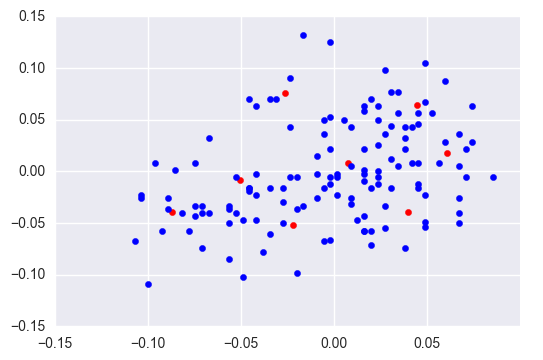

In [246]:
clf = KMeans()
x_train, x_test, y_train, y_test = train_test_split(df[["age", "avbp"]],
                                                    df["class"], 
                                                    test_size=0.3)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.labels_)
plt.scatter(clf.cluster_centers_[:,0], clf.cluster_centers_[:,1], color='r')
plt.scatter(x_test['age'], x_test['avbp'], color='blue')